In [1]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


In [2]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [3]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [4]:
from tqdm import tqdm_notebook
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

we get the reviews information about boAt-Xtend-Pro-Dedicated-Bluetooth from Amazon.com

# Now Save results to a Dataframe, then export as CSV

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
4,4.0 out of 5 stars\nGood quality watch in budg...,4.0,Its a good quality watch if you are on a budge...,Reviewed in India on 29 October 2023
...,...,...,...,...
105,4.0 out of 5 stars\nBody mentened,4.0,Nice calling,Reviewed in India on 5 September 2023
106,3.0 out of 5 stars\nGood one,3.0,Like,Reviewed in India on 27 September 2023
107,3.0 out of 5 stars\nValue for Money,3.0,Good looking,Reviewed in India on 20 October 2023
108,4.0 out of 5 stars\nGood,4.0,Excellent,Reviewed in India on 1 September 2023


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)
df.head(50)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nGood quality watch in budg...,4.0,Its a good quality watch if you are on a budge...,29 October 2023
5,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
6,4.0 out of 5 stars\nPremium quality Value for ...,4.0,"Awesome design, sound and features. Also have ...",31 October 2023
7,4.0 out of 5 stars\nGood Quality,4.0,Product also good need to update advance featu...,30 October 2023
8,4.0 out of 5 stars\nSuper watch,4.0,Boat xtend watch is very nice all features...,1 November 2023
9,4.0 out of 5 stars\nGood quality,4.0,It's better,30 October 2023


In [8]:
df.to_csv("BoatSmartWatch_Review.csv")

# Load Dataset

In [9]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nGood quality watch in budg...,4.0,Its a good quality watch if you are on a budge...,29 October 2023
...,...,...,...,...
105,4.0 out of 5 stars\nBody mentened,4.0,Nice calling,5 September 2023
106,3.0 out of 5 stars\nGood one,3.0,Like,27 September 2023
107,3.0 out of 5 stars\nValue for Money,3.0,Good looking,20 October 2023
108,4.0 out of 5 stars\nGood,4.0,Excellent,1 September 2023


# Data Exploration

In [10]:
reviews.Rating.describe()

count    110.000000
mean       3.836364
std        0.498204
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [12]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

Here review column having two null values,lets drop these values.

In [13]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nGood quality watch in budg...,4.0,Its a good quality watch if you are on a budge...,29 October 2023


# Data Visualization

# Date vs Review Count

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

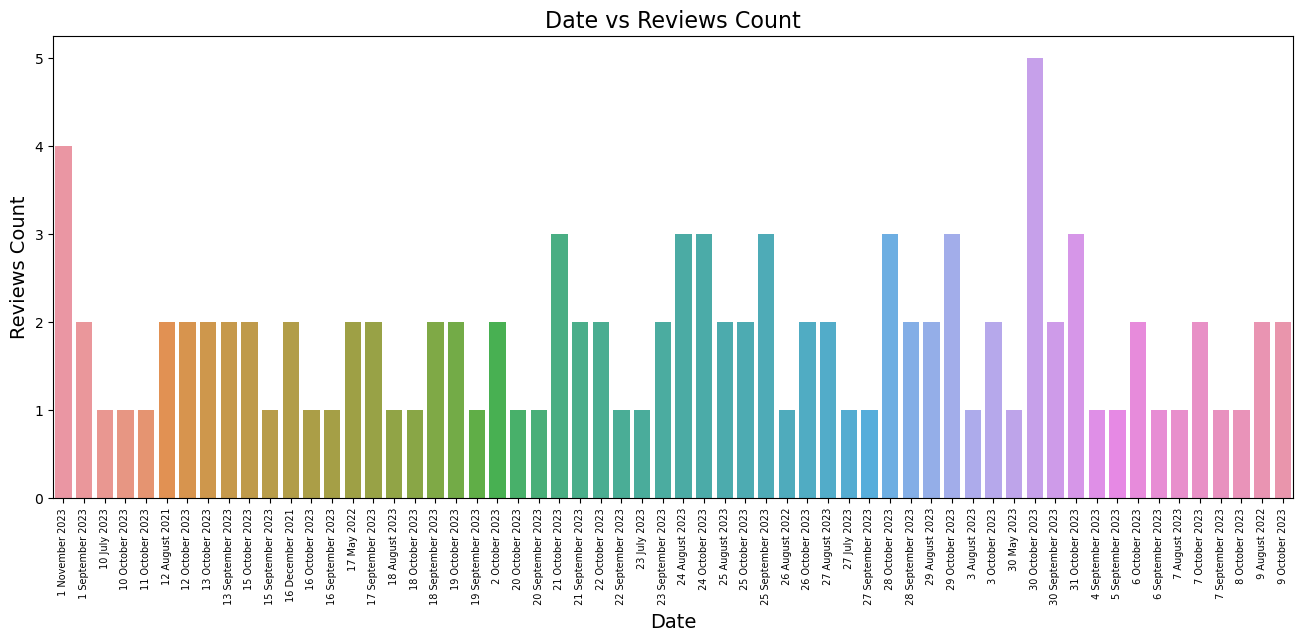

In [15]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

1)By looking at the barchart,we can see ho thw numbers of reviews varies ovver time.we can understand or identify the periods with high or low review activity.

2)Peaks in the bar chart represent dates with exceptionally high review counts. These peaks could be due to various factors such as product launches, promotions, or events. Valleys, on the other hand, represent dates with unusually low review counts, which might indicate periods of low customer engagement.

3)we can see the data spans a long period, we can identify seasonal patterns in customer reviews. For example, a product might receive more reviews during holiday seasons or specific months of the year,FOr Example octomber2023.

# Percentage of Ratings

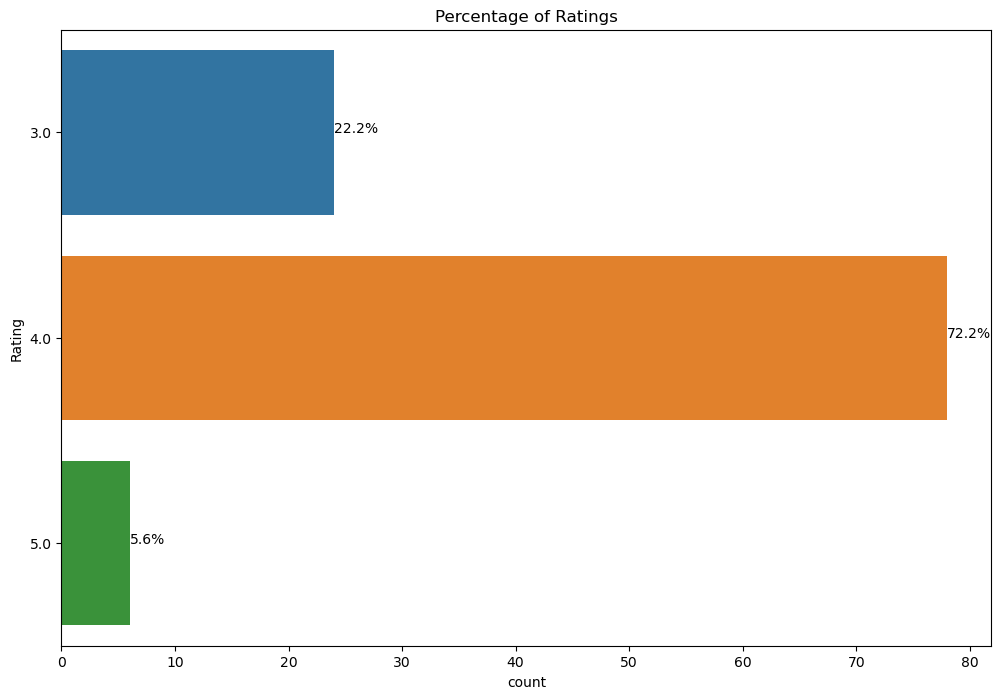

In [16]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

1)Here 72.2% customers giving 4.0 rating and 6.5% customer giving 5.0 rating and only 21.3% customwers giving 3.0 rating,it means most off customers having positive review.

2)By analyzing the percentage annotations,we can quickly identify the proportion of customers who gave each rating,higher percentage of 4 star rating suggest a high level customers satisfaction.


# BasicText Preprocessing for Sentiment Analysis

# Spelling Correction

In [17]:
from textblob import TextBlob

In [18]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Review OverviewAverage2.The Coat today launche...
1    The media could not be loaded.\n              ...
2    Shipping the parts mostly covered in other rev...
3    His smart (model Coat extend plus) watch is sa...
4    Its a good quality watch if you are on a budge...
Name: Review, dtype: object

In [19]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Review OverviewAverage2.7The Boat today launch...
1,The media could not be loaded.\n ...
2,Skipping the parts mostly covered in other rev...
3,This smart (model Boat extend plus) watch is f...
4,Its a good quality watch if you are on a budge...
...,...
105,Nice calling
106,Like
107,Good looking
108,Excellent


# Resetting index

In [20]:
boat_review.reset_index(drop=True, inplace=True)

In [21]:
from nltk.corpus import stopwords

In [22]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


#  Lemmatizer 

In [23]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mandar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
#Reducing a word to its base or root form using lemmatizer
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/108 [00:00<?, ?it/s]

In [25]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."


# 7. Text Pre-processing Techniques
# A. Removing '@names'

In [26]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [27]:
import numpy as np
import pandas as pd

In [28]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,product also good need update advance feature ...,product also good need update advance features...
8,boat xtend watch nice feature,boat xtend watch nice features...
9,better,it's better


# B. Removing links (http | https)

In [29]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,product also good need update advance feature ...,product also good need update advance features...
8,boat xtend watch nice feature,boat xtend watch nice features...
9,better,it's better


# C. Removing Review with empty text

In [30]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,product also good need update advance feature ...,product also good need update advance features...
8,boat xtend watch nice feature,boat xtend watch nice features...
9,better,it's better


# D. Dropping duplicate rows

In [31]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,product also good need update advance feature ...,product also good need update advance features...
8,boat xtend watch nice feature,boat xtend watch nice features...
9,better,it's better


# E. Function to remove emoji

In [32]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [33]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,product also good need update advance feature ...,product also good need update advance features...
8,boat xtend watch nice feature,boat xtend watch nice features...
9,better,it's better


# F. Removing Stop words

In [34]:
import codecs

In [35]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [36]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [37]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
7,product also good need update advance feature ...,product also good need update advance features...
8,boat xtend watch nice feature,boat xtend watch nice features...
9,better,it's better


# G. Tokenize 'Clean_Reviews'

In [38]:
#breaking down a text into individual units,by using Punkt tokenizer.
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mandar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'used', 'watch', 'month', 'bought', 'first', 'sale', 'keep', 'reading', 'unbiased', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'smoothly', 'large', 'curved', 'display', 'price', 'category', 'inch', 'battery', 'heavy', 'usage', 'frequently', 'waking', 'screen', 'alexa', 'alarm', 'notification', 'day', 'standby', 'checking', 'time', 'occassionally', 'day', 'pretty', 'good', 'full', 'charging', 'time', 'hour', 'decent', 'quality', 'magnetic', 'charging', 'cable', 'provided', 'use', 'low', 'power', 'adapter', 'power', 'bank', 'laptop', 'necessary', 'health', 'workout', 'tracking', 'option', 'spo', 'oxymeter', 'heart', 'rate', 'monitor', 'accuracy', 'sleep', 'tracking', 'pretty', 'accurate', 'paedometer', 'accurate', 'time', 'sometimes', 'hundred', 'step', 'added', 'randomly', 'without', 'activity', 'happens', 'randomly', 'day', 'stress', 'monitor', 'also', 'sure', 'calculated', 'sensor', 'fake', 'probably', 'watch', 'contact',

In [40]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [review, overviewaverage, boat, today, launche...
1    [medium, could, loaded, used, watch, month, bo...
2    [skipping, part, mostly, covered, review, spon...
3    [smart, model, boat, extend, plus, watch, func...
4    [good, quality, watch, budget, cannot, used, t...
5    [pro, premium, build, quality, matte, finishin...
6    [awesome, design, sound, feature, also, custom...
7    [product, also, good, need, update, advance, f...
8                  [boat, xtend, watch, nice, feature]
9                                             [better]
Name: Clean_Reviews, dtype: object

In [41]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra...","[good, quality, watch, budget, can, not, used,..."
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."
6,awesome design sound feature also customizable...,"awesome design, sound features. also customiza...","[awesome, design, sound, feature, also, custom..."
7,product also good need update advance feature ...,product also good need update advance features...,"[product, also, good, need, update, advance, f..."
8,boat xtend watch nice feature,boat xtend watch nice features...,"[boat, xtend, watch, nice, feature]"
9,better,it's better,[better]


1)The 'Clean_Reviews' column, which likely contains cleaned and processed text data, has been successfully tokenized into individual words. This step is essential for further text analysis tasks as it breaks down the text into meaningful units.

2)The tokenization has been performed at the word level, meaning that each word in the reviews has been separated into a distinct element in the list.

# H. Converting words to Stemmer

In [42]:
from nltk.stem.snowball import SnowballStemmer

In [43]:
stemmer = SnowballStemmer("english")

In [44]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,review overviewaverag boat today launch boat x...
1,medium could load use watch month bought first...
2,skip part most cover review sponsor yt one add...
3,smart model boat extend plus watch function we...
4,good qualiti watch budget cannot use track swi...
...,...
103,nice call
104,like
105,good look
106,excel


The 'Clean_Reviews' column has been processed through stemming, which reduces words to their base or root form,For instance, words like  "launched," "good looking" all be stemmed to "launch" ,"good look"

# I. Converting words to Lemma

In [45]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,review overviewaverage boat today launched boa...
1,medium could loaded used watch month bought fi...
2,skipping part mostly covered review sponsored ...
3,smart model boat extend plus watch functioning...
4,good quality watch budget cannot used tracking...
...,...
103,nice calling
104,like
105,good looking
106,excellent


# Basic Feature Extaction

#  Applying bag of Words without N grams

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [48]:

print(cv.get_feature_names_out()[109:200])

['better' 'beyond' 'bezel' 'bezzels' 'bhi' 'big' 'bike' 'bip' 'bit'
 'black' 'bloated' 'blood' 'bluetooth' 'boat' 'body' 'bother' 'bought'
 'box' 'bp' 'break' 'breath' 'breathing' 'bright' 'brightness' 'brings'
 'brother' 'browsing' 'brushed' 'bt' 'budget' 'bug' 'build' 'buildi'
 'built' 'bulb' 'burnt' 'bus' 'button' 'buy' 'buying' 'cable' 'cache'
 'calculated' 'calculating' 'calculation' 'calculator' 'calender' 'call'
 'called' 'caller' 'calling' 'calorie' 'calory' 'cals' 'camera' 'cannot'
 'capability' 'carddesign' 'care' 'case' 'category' 'catering' 'caused'
 'center' 'centerbefore' 'certain' 'change' 'changed' 'charge' 'charger'
 'charging' 'charm' 'cheap' 'check' 'checked' 'checking' 'childish'
 'chinese' 'choice' 'claim' 'claimed' 'classic' 'clean' 'clear' 'clearing'
 'clearly' 'click' 'clipuser' 'clone' 'close' 'cloud']


In [49]:
print(cv.get_feature_names_out()[:100])

['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accessibility' 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'activate' 'activating'
 'active' 'activites' 'activity' 'actual' 'actually' 'adapter' 'add'
 'added' 'addition' 'adjust' 'advance' 'advanced' 'advertised' 'aggregate'
 'alarm' 'alert' 'alexa' 'allow' 'allowed' 'allowing' 'almost' 'alright'
 'also' 'alternative' 'aluminium' 'always' 'amazfit' 'amazon' 'amazoni'
 'amezonother' 'amoled' 'amount' 'analog' 'android' 'angle' 'animal'
 'animation' 'anniversary' 'another' 'answer' 'anyone' 'anyonefor'
 'anything' 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'apple' 'appreciate' 'apps'
 'appyou' 'around' 'aside' 'asks' 'aspect' 'assistant' 'assisted' 'atm'
 'attached' 'attaching' 'attention' 'attractive' 'audio' 'auto'
 'available' 'average' 'away' 'awesome' 'back' 'background' 'bad' 'badge'
 'band' 'bank' '

In [50]:
print(tweetscv.toarray()[100:200])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [51]:
dataframe = dataframe.reset_index(drop=True)

In [52]:
from nltk.stem.porter import PorterStemmer

In [53]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/107 [00:00<?, ?it/s]

In [54]:
corpus[3]

'smart model boat extend plu watch function well worth price r batteri begin last day next charg last day last settl one day extens user app amol display good touch featur good access app easili reachabl simpl brows featur sleep measur good take day time nap night time show exactli went sleep woke spo measur neaarer measur person digit instrument heart rate measur also nearer instrument stress also reflect nearli real condit activ step show correct distanc also good watch take bike ride walk show distanc cover set target sport featur check yet fulli check featur function water resist ye water resist check bath drizzl rain time display good number display avail cloud suffici alway featur work model avail featur pleas could skin made avail display wrist put rest rais respect featur function featur alway enabl otherwis function bluetooth call featur good speaker loud enough take call use listen audio video walk ofcours batteri drain quickli messag ye good see notif flash light function ok

# Applying Countvectorizer (Creating the Bag of Words model)

In [55]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [56]:
X.shape

(107, 1546)

In [57]:
cv.get_feature_names_out()[:20]

array(['accept', 'access', 'accur', 'accuraci', 'accuraci sleep',
       'accuraci sleep track', 'activ', 'activ step', 'actual', 'ad',
       'add', 'advanc', 'alarm', 'alarm set', 'alarm timer', 'alert',
       'alexa', 'alexa support', 'alexa watch', 'alexa work'],
      dtype=object)

In [58]:

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [59]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,ad,...,worth price,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye,yt
0,0,1,4,3,0,0,1,0,0,1,...,0,4,2,2,0,20,7,1,1,0
1,0,0,3,1,1,1,3,0,1,2,...,0,0,0,0,0,1,0,1,1,0
2,1,1,0,1,0,0,6,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1)There are 108 instances (rows) and 1546 unique words (columns).

2)Each cell in the DataFrame contains the count of the corresponding word in the respective instance. For example, the cell at row 0, column 'accur' has a value of 4, indicating that the word 'accur' appears 4 times in the first document.

3)Most of the cells have 0 values, indicating that the corresponding word does not appear in the respective instance.

# TF-IDF Vectorizer

In [60]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/107 [00:00<?, ?it/s]

In [61]:
corpus[4]

'good qualiti watch budget cannot use track swim lap use cycl simpli walk even daili step tracker good anyon sport would suggest invest littl'

# Applying TF-IDF Vectorizer

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [64]:
X.shape

(107, 1546)

In [65]:
tfidf_v.get_feature_names_out()[:20]

array(['accept', 'access', 'accur', 'accuraci', 'accuraci sleep',
       'accuraci sleep track', 'activ', 'activ step', 'actual', 'ad',
       'add', 'advanc', 'alarm', 'alarm set', 'alarm timer', 'alert',
       'alexa', 'alexa support', 'alexa watch', 'alexa work'],
      dtype=object)

In [66]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [67]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,ad,...,worth price,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye,yt
0,0.000000,0.013938,0.055753,0.036180,0.000000,0.000000,0.013075,0.000000,0.000000,0.015757,...,0.000000,0.063026,0.035466,0.035466,0.000000,0.278765,0.12413,0.014455,0.014455,0.000000
1,0.000000,0.000000,0.071239,0.020546,0.026844,0.026844,0.066827,0.000000,0.024626,0.053688,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.023746,0.00000,0.024626,0.024626,0.000000
2,0.029634,0.026214,0.000000,0.022681,0.000000,0.000000,0.147541,0.029634,0.027185,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.025357,0.000000,0.00000,0.000000,0.000000,0.031257
3,0.000000,0.037973,0.000000,0.000000,0.000000,0.000000,0.035621,0.042927,0.000000,0.000000,...,0.045279,0.000000,0.000000,0.000000,0.036732,0.000000,0.00000,0.000000,0.078762,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.195084,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


1)Each cell in the DataFrame contains the TF-IDF value of the corresponding word in the respective instance. TF-IDF reflects the importance of a word in a document relative to a collection of documents (corpus). It takes into account both the frequency of the word in the document (TF) and the rarity of the word in the corpus (IDF).

2)Higher TF-IDF values indicate that a word is important in a specific document relative to the rest of the corpus.

# Named Entity Recognition (NER)

In [68]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'review overviewaverage boat today launched boat xtend company latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembling apple watch moreover built amazon alexa support spo tracking stress tracking much coming budget segment worth buy smartwatch query nothing worry detailed review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfinal wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharging clipuser manual warranty carddesign build comfortwhen buying smartwatch one always think design look apart feature design build another major aspect one take care buying smartwatch boat worked design time brings premium side term look design inspired apple watch cannot compared obviously every aspect apple watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build quality much premium one boat xtend design b

# Parts Of Speech (POS) Tagging

In [69]:
!pip install spacy

In [70]:
import spacy
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [71]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In the processed text snippet, various entities have been recognized, such as DATE, CARDINAL (numerical values), PERSON (personal names), and ORDINAL (ordinal numbers). spaCy's named entity recognition has identified these entities in the text based on its pre-trained model.

In [72]:
for token in doc_block[:50]:
    print(token,token.pos_)

review NOUN
overviewaverage NOUN
boat NOUN
today NOUN
launched VERB
boat NOUN
xtend NOUN
company NOUN
latest ADJ
budget NOUN
smartwatch NOUN
price NOUN
tag NOUN
r NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
come VERB
stylish ADJ
design NOUN
resembling VERB
apple NOUN
watch NOUN
moreover ADV
built VERB
amazon PROPN
alexa ADJ
support NOUN
spo NOUN
tracking VERB
stress NOUN
tracking VERB
much ADJ
coming VERB
budget NOUN
segment NOUN
worth ADJ
buy VERB
smartwatch NOUN
query NOUN
nothing PRON
worry VERB
detailed ADJ
review NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
clear ADJ
doubt PROPN
contentsbox PROPN


In this code, token represents each word/token in the processed text,For example
"review" is tagged as NOUN (noun)
"launched" is tagged as VERB (verb)
"stylish" is tagged as ADJ (adjective)
"resembling" is tagged as VERB (verb)
"amazon" is tagged as PROPN (proper noun)
"nothing" is tagged as PRON (pronoun)

# Filtering the nouns and verbs only

In [73]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['believe', 'gold', 'color', 'fade', 'time', 'color', 'variant', 'look', 'one', 'opinion', 'color', 'scheme', 'find', 'color', 'scheme', 'boat', 'xtend', 'watch', 'water', 'resistance', 'silicon', 'strap', 'strap', 'quality', 'strap', 'find', 'usage', 'displaycoming', 'display', 'watch', 'shape', 'display', 'see', 'panel', 'screen', 'bezel', 'part', 'screen', 'go', 'notice', 'bezel', 'screen', 'quality', 'feel', 'display', 'complain', 'watch', 'offer', 'screen', 'time', 'level', 'brightness', 'control', 'boat', 'xtend', 'display', 'qualityi', 'find', 'display', 'quality', 'boat', 'xtend', 'smartwatch', 'smartwatch', 'boat', 'view', 'angle', 'one', 'see', 'content', 'smartwatch', 'sunlight', 'saturated', 'complain', 'price', 'range', 'watch', 'smartwatch', 'use', 'button', 'watch', 'work', 'power', 'button', 'button', 'display', 'display', 'work', 'problem', 'animation', 'bar', 'menu', 'navigation', 'simple', 'find', 'use', 'watch', 'lag', 'bit', 'company']


# Counting the noun & verb tokens

In [74]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,175
1,boat,92
2,feature,75
3,time,62
4,day,58
5,display,50
6,smartwatch,48
7,app,46
8,work,45
9,xtend,44


# Visualizing results (Barchart for top 10 nouns + verbs)

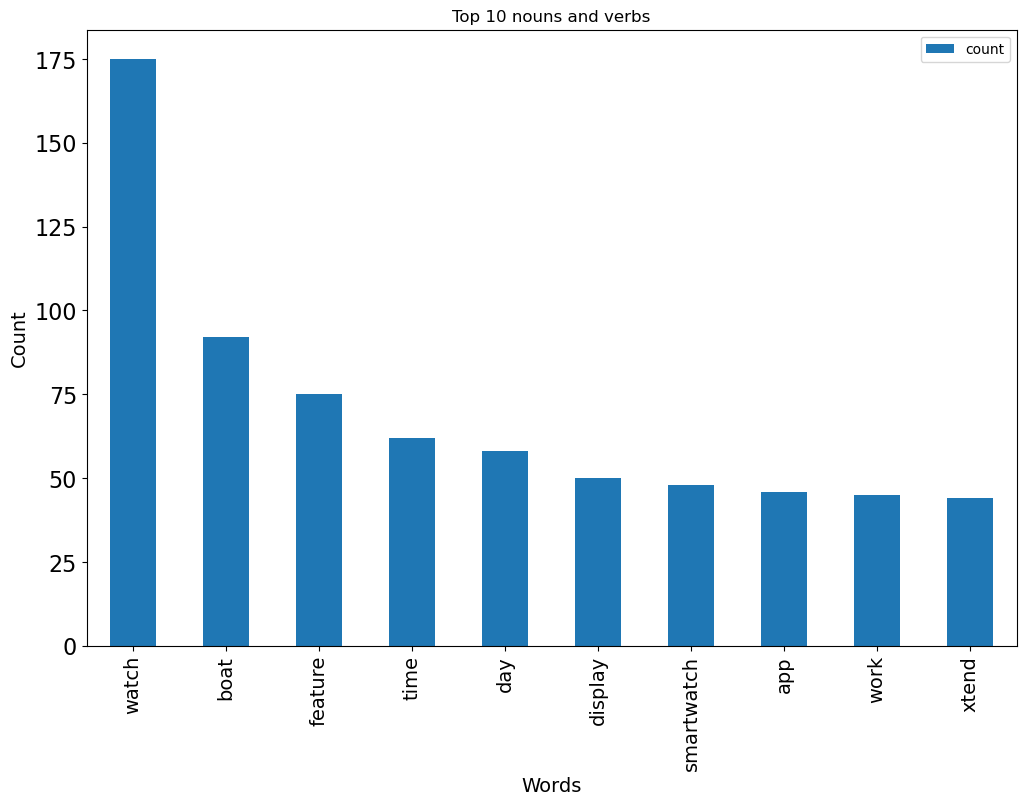

In [75]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Based on the output and output visualization, it shows the top 10 words in your text data along with their respective frequencies. For example, 'watch' appears 175 times, 'boat' appears 92 times, and so on.

# Feature Extraction

#  BOW Features

In [76]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


# B. TF-IDF Features

In [77]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


# Fetch sentiments Using TextBlob

In [78]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [79]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,100
neg,7


1)There are 100 reviews classified as positive ('pos').

2)There are 7 reviews classified as negative ('neg').

# Let's calculate subjectivity and Polarity

In [80]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra...","[good, quality, watch, budget, can, not, used,...",0.411429,0.242500


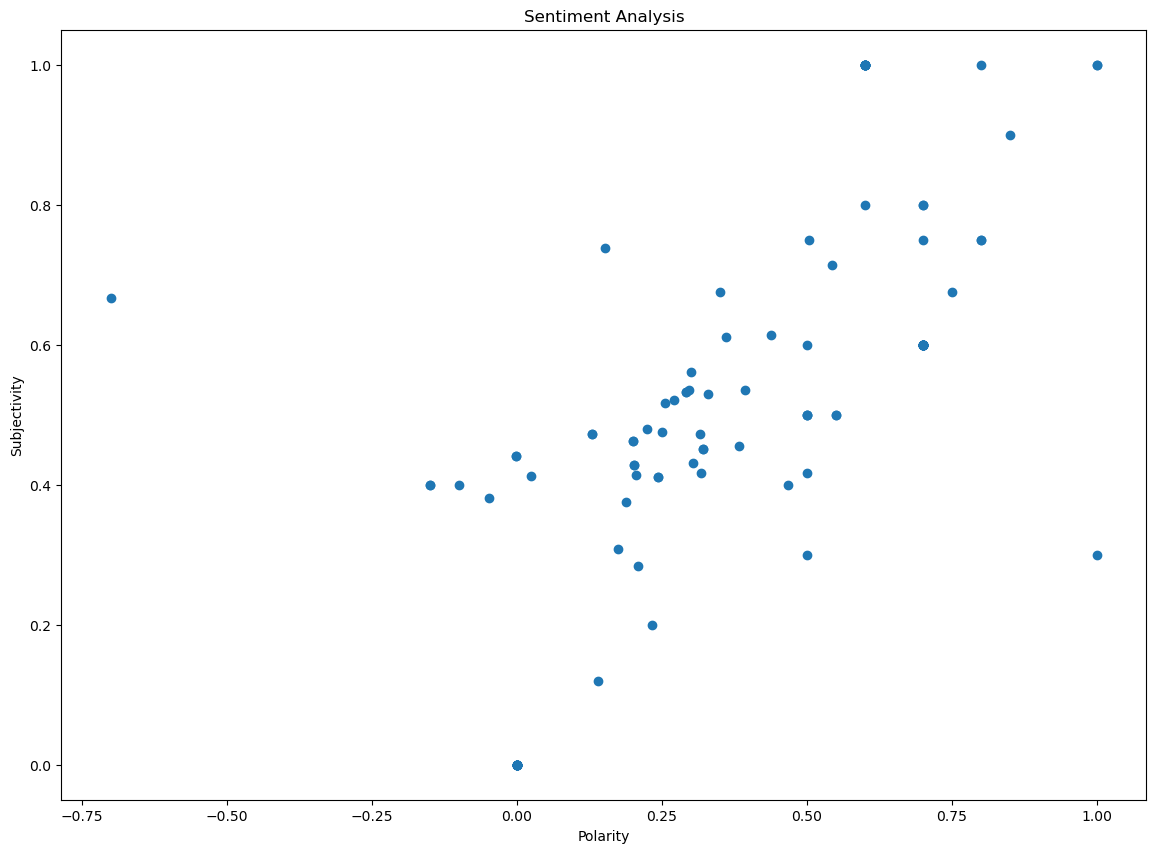

In [81]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

1)Majority of the reviews in the dataset are positive, with a significant number of them being classified as 'pos' according to TextBlob sentiment analysis.

2)The calculated subjectivity scores suggest that the reviews are moderately subjective, meaning that users express a mix of opinions and emotions in their feedback.

3)The polarity scores indicate that, on average, the reviews tend to be positive, as the polarity values are greater than 0. However, there are also neutral and slightly negative reviews 

In [82]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171,pos
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
4,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra...","[good, quality, watch, budget, can, not, used,...",0.411429,0.242500,pos


1)After incorporating sentiment analysis results, the majority of reviews are still positive ('pos'). Positive sentiments dominate the dataset, indicating that users generally have favorable opinions about the product or service.

2)The reviews exhibit a moderate level of subjectivity, suggesting that users express diverse opinions and emotions in their feedback.

3)The average polarity is positive, indicating an overall positive sentiment. The majority of users express satisfaction or positive experiences with the product.

4)The cleaned and sentiment-labeled dataset has been successfully exported to a CSV file named 'clean_review.csv'. This processed dataset can be utilized for further analysis and modeling tasks.

# Story Generation and Visualization

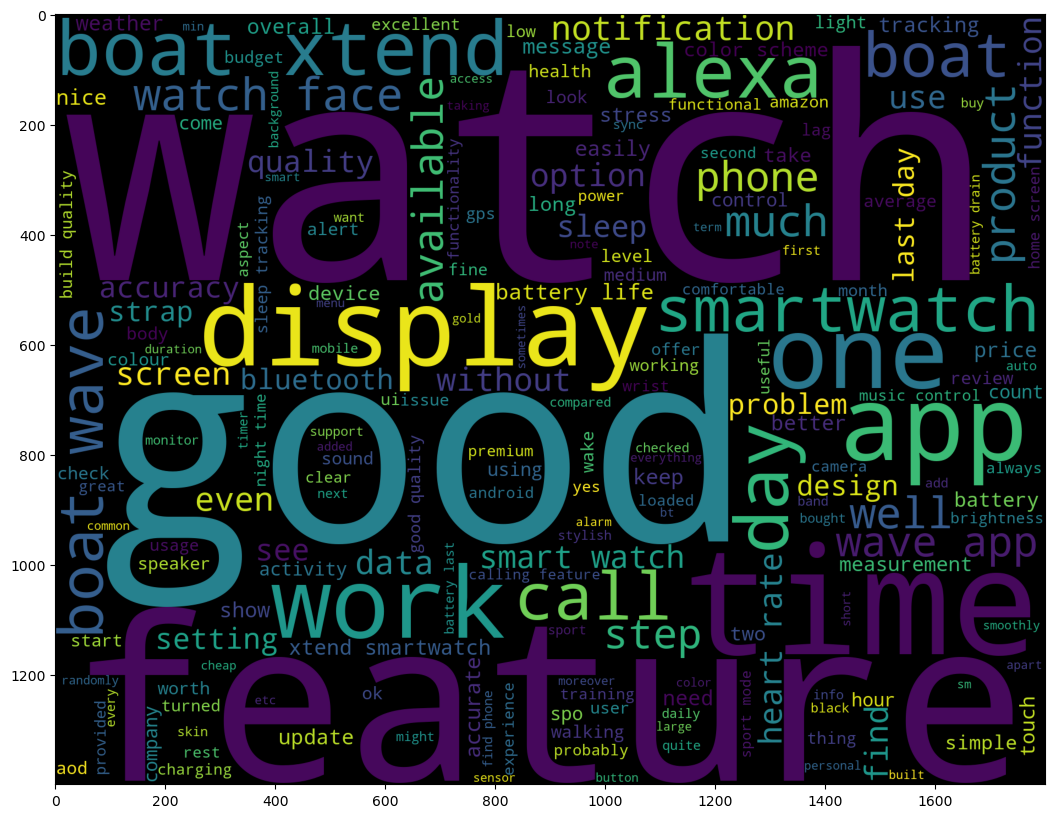

In [83]:
from wordcloud import WordCloud
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

# Most common words in positive Review

In [84]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

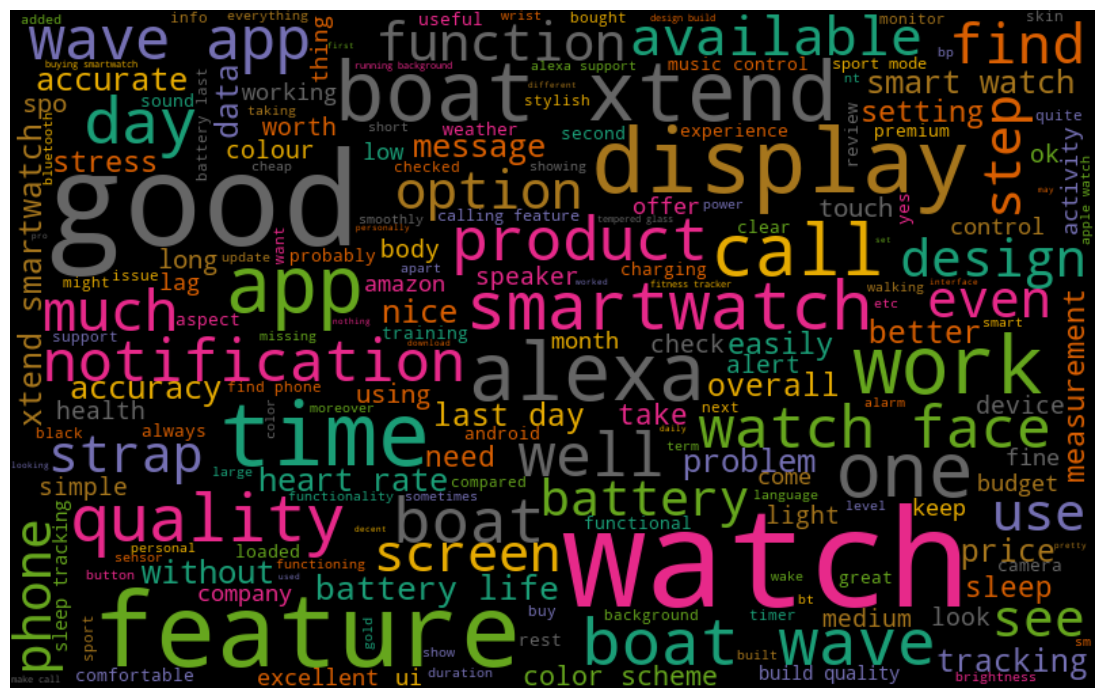

In [85]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

# Most common words in negative Review

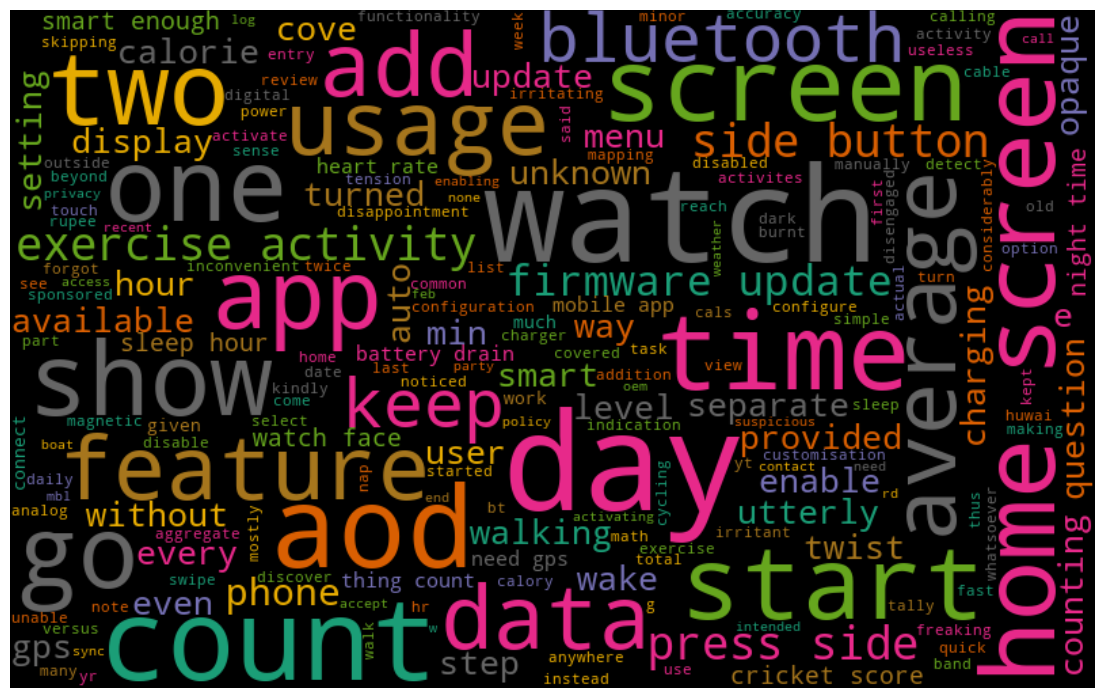

In [86]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

In [87]:
# 1st method Sentiment Analysis of given text using SentimentIntensityAnalyzer 
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2nd method Sentiment Analysis of given text using TextBlob:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [91]:
# Compute The Negative, Neutral, Positive Analysis by using Analysis function
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
dataframe["analysis"] = dataframe["Polarity"].apply(analysis)

In [93]:
#lets filter the tweet into two categories
positive_reviews =dataframe[dataframe['analysis'] == 'Positive']
negative_reviews = dataframe[dataframe['analysis'] == 'Negative']

print('positive reviews')
for i, row in positive_reviews[:5].iterrows():
    print(' -' + row['Clean_Reviews'])

print('negative reviews')
for i, row in negative_reviews[:5].iterrows():
    print(' -' + row['Clean_Reviews'])

positive reviews
 -review overviewaverage boat today launched boat xtend company latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembling apple watch moreover built amazon alexa support spo tracking stress tracking much coming budget segment worth buy smartwatch query nothing worry detailed review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfinal wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharging clipuser manual warranty carddesign build comfortwhen buying smartwatch one always think design look apart feature design build another major aspect one take care buying smartwatch boat worked design time brings premium side term look design inspired apple watch cannot compared obviously every aspect apple watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build quality much premium one b

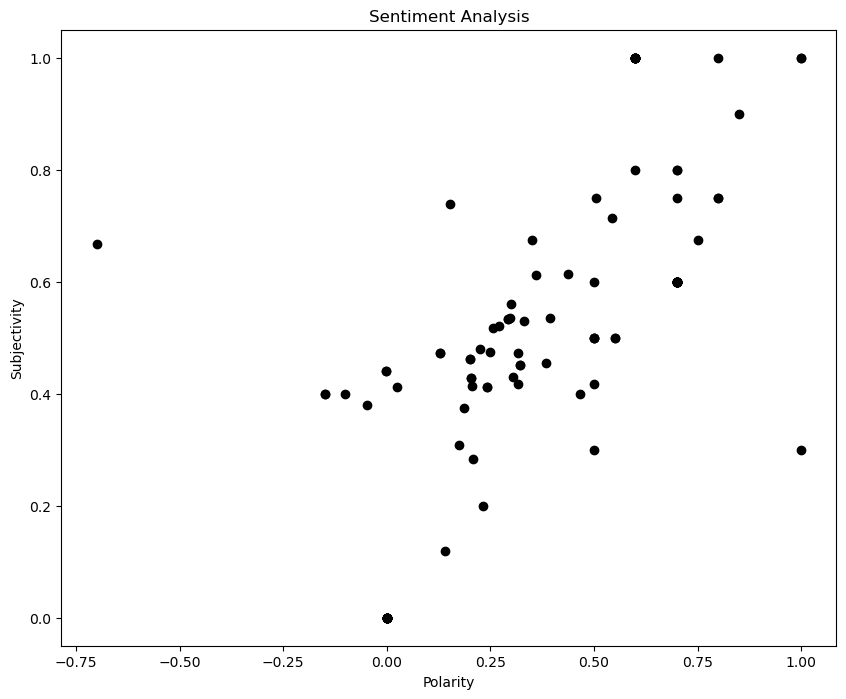

In [96]:
plt.figure(figsize=(10, 8))

for i in range(0, dataframe.shape[0]):
    plt.scatter(dataframe["Polarity"][i], dataframe["Subjectivity"][i], color = "Black")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [97]:
# calculates the percentage of positive tweets relative to negative tweets in the dataset
(len(positive_reviews) / len(negative_reviews))*100

1242.857142857143

# Colclusion:The ratio of positive to negative reviews being significantly greater than 100% indicates a dominance of positive sentiment,
# hence that number is positive, and quite high of a ratio, so we can conclude  most off customers are positively satisfied with this product.